# Visualizations

These are Visualizations

In [1]:
import sys

if "psycopg2" not in sys.modules:
    !{sys.executable} -m pip install psycopg2-binary

In [2]:
# Allow importing files 
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# populating the database
import csv_to_postgres
csv_to_postgres.data_ingestion_matches()
csv_to_postgres.data_ingestion_team_salaries()
csv_to_postgres.data_ingestion_player_stats()


MatchData table already contains data. Skipping ingestion.
TeamSalaries table already contains data. Skipping ingestion.
PlayerStats table already contains data. Skipping ingestion.


In [4]:
from db_views import get_top_10_players_with_most_goals_added , get_rolling_ppg_for_team, get_total_guaranteed_salaries_for_all_teams
top10_players = get_top_10_players_with_most_goals_added()
ATL_rolling_ppg = get_rolling_ppg_for_team('ATL')
total_salaries = get_total_guaranteed_salaries_for_all_teams()


[{'team': 'ATL', 'total_guar': Decimal('20662733.0')}, {'team': 'ATX', 'total_guar': Decimal('20293880.0')}, {'team': 'CHI', 'total_guar': Decimal('25377012.0')}, {'team': 'CIN', 'total_guar': Decimal('22709609.0')}, {'team': 'CLB', 'total_guar': Decimal('17431964.0')}, {'team': 'CLT', 'total_guar': Decimal('18283170.0')}, {'team': 'COL', 'total_guar': Decimal('17256580.0')}, {'team': 'DCU', 'total_guar': Decimal('17992939.0')}, {'team': 'FCD', 'total_guar': Decimal('17314991.0')}, {'team': 'HOU', 'total_guar': Decimal('20515359.0')}, {'team': 'LAFC', 'total_guar': Decimal('23634223.0')}, {'team': 'LAG', 'total_guar': Decimal('22235492.0')}, {'team': 'MIA', 'total_guar': Decimal('42227583.0')}, {'team': 'MIN', 'total_guar': Decimal('17925557.0')}, {'team': 'MTL', 'total_guar': Decimal('13387068.0')}, {'team': 'NER', 'total_guar': Decimal('21066528.0')}, {'team': 'NSH', 'total_guar': Decimal('21864490.0')}, {'team': 'NYC', 'total_guar': Decimal('16530703.0')}, {'team': 'NYRB', 'total_gu

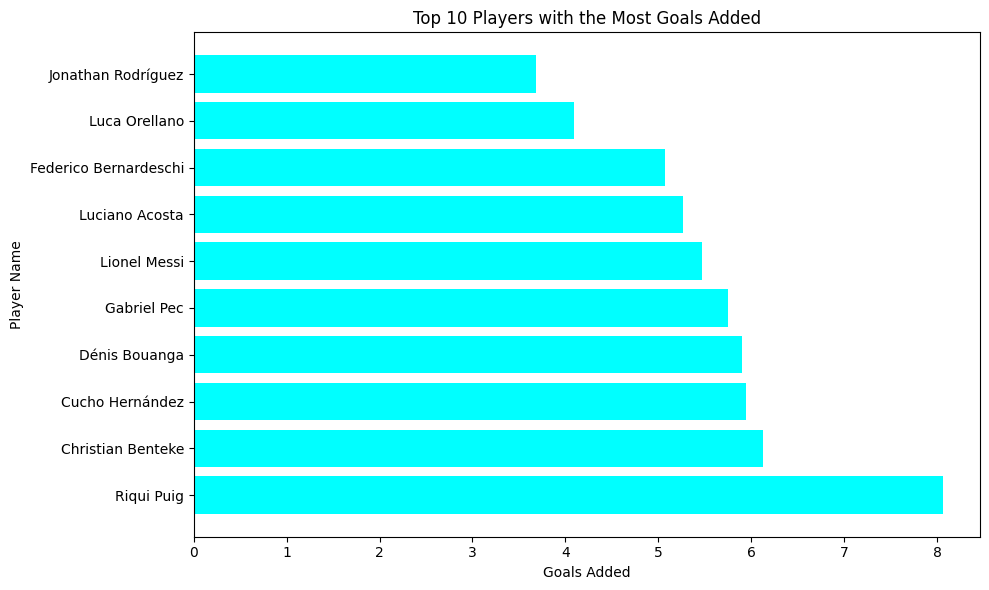

In [5]:
# use matplotlib to visualize the top 10 players with the most goals
import matplotlib.pyplot as plt

# Extract player names and expected goals from the list of dictionaries
player_names = [player['player_name'] for player in top10_players]
goals_added = [player['goals_added'] for player in top10_players]

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(player_names, goals_added, color='cyan')

# Adding labels and title
plt.xlabel('Goals Added')
plt.ylabel('Player Name')
plt.title('Top 10 Players with the Most Goals Added')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the chart
plt.show()

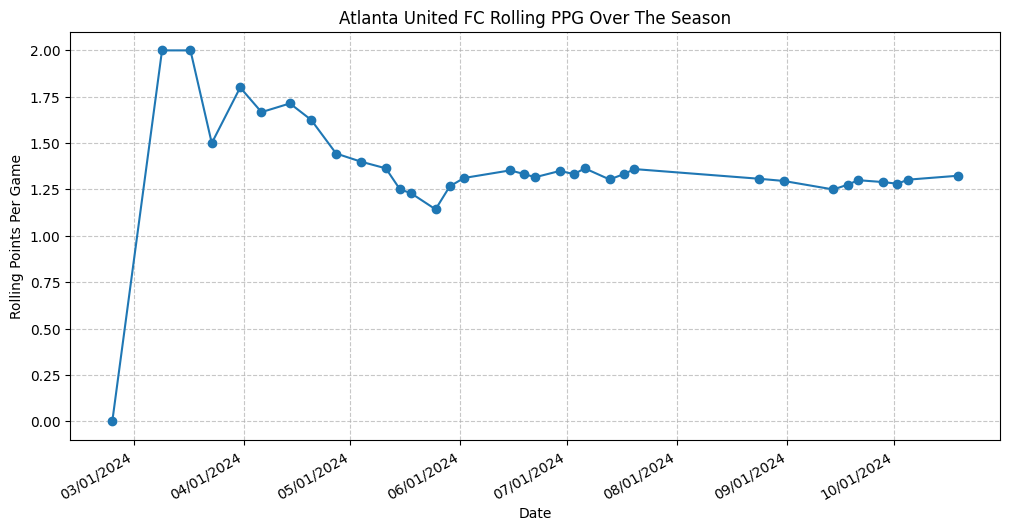

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert dictionary into lists for plotting
dates = list(ATL_rolling_ppg.keys())
ppg_values = list(ATL_rolling_ppg.values())

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(dates, ppg_values, marker='o')

# Format the x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Rolling Points Per Game')
plt.title('Atlanta United FC Rolling PPG Over The Season')

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

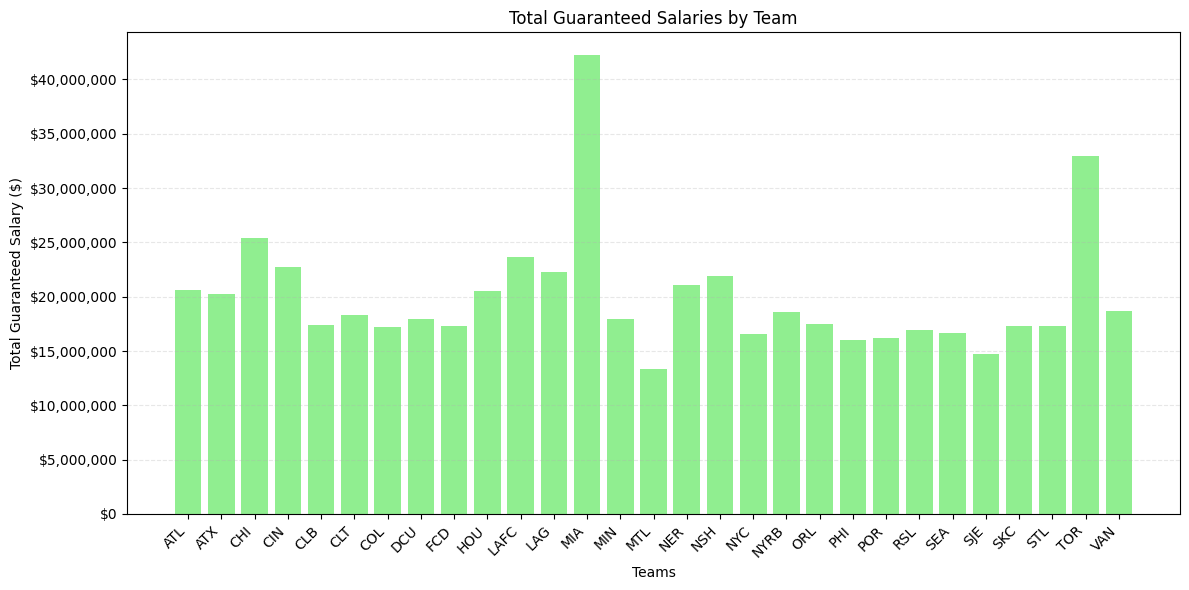

In [9]:
# Create a histogram of total guaranteed salaries by team
plt.figure(figsize=(12, 6))

# Since total_salaries is a list of dictionaries, extract the data
team_names = [salary['team'] for salary in total_salaries]
salary_values = [salary['total_guar'] for salary in total_salaries]

# Create the histogram
plt.bar(team_names, salary_values, color='lightgreen')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.xlabel('Teams')
plt.ylabel('Total Guaranteed Salary ($)')
plt.title('Total Guaranteed Salaries by Team')

# Format y-axis labels to show millions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()